In [1]:
#import librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

from feature_engine.selection import DropDuplicateFeatures, DropCorrelatedFeatures, DropConstantFeatures 

# Linear Method

The coefficients of a linear predictor are directly proportional on how much that feature contributes to the final value of Y.

But for linear models, a few assomptions are made:
   * Linear relationship between predictors (Xs) and target (Y).
   * Predictors are independent.
   * Predictors are not correlated between themselves(no-multicollinearity).
   * Normally distributed.
   * And same scale because the magnitude of the coefficients is directly influenced by the scale of the features. 
   * Homoscedasticty (variance should be the same) -> The error term is the same across all values of the independent variables. Also known as homogeneity of variance.
  
In general, stronger regularization returns smaller coefficient.

## Classification - Logistic Regression coefficient

In [2]:
df = pd.read_csv("./precleaned-datasets/dataset_2.csv")

In [3]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [4]:
df = df[[x for x in df.columns if df[x].dtype != "object"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(
    labels=["target"], axis=1), df["target"], test_size=0.33, random_state=42)

In [6]:
pipeline = Pipeline([
    ("Scaler", StandardScaler()),  # Scale the data
    ("ModelSelect", SelectFromModel(LogisticRegression(
        C=1000, penalty="l2", solver="liblinear")))  # Select the best features using ridge regularization (C is for the strenght of the regularization)
])

In [7]:
pipeline.fit_transform(X_train,y_train)

array([[-0.2157236 , -0.44791643,  0.14626203, ...,  0.11883367,
        -0.37697441, -0.99025251],
       [ 1.02309158, -0.44791643,  1.21222541, ..., -1.95357092,
        -0.9715004 , -0.04318612],
       [ 0.48774282, -0.44791643, -0.09820128, ..., -0.15745202,
         0.01110261, -0.09315571],
       ...,
       [-1.51273686, -0.44791643,  0.22769051, ...,  0.8883904 ,
        -0.3671743 , -0.09007849],
       [ 0.86083838, -0.44791643,  0.78951674, ..., -0.39171537,
        -0.43169042, -0.66321598],
       [ 0.86782015, -0.44791643,  1.85248826, ..., -0.30055152,
         0.59321507, -0.47288799]])

In [8]:
# Features with coefficient greater than the means of all the coefficient in the dataset
pipeline["ModelSelect"].get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True, False,  True, False, False, False,  True,  True])

In [9]:
print(f"Number of features selected: {len(X_train.columns[pipeline['ModelSelect'].get_support()])}")

Number of features selected: 31


<AxesSubplot:>

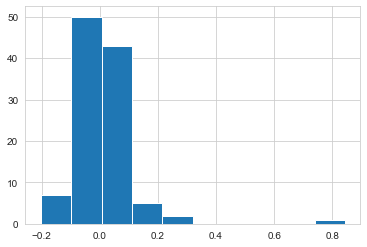

In [10]:
pd.Series(pipeline['ModelSelect'].estimator_.coef_.ravel()).hist()

<AxesSubplot:>

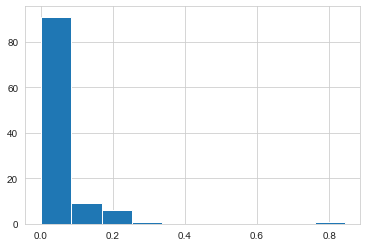

In [11]:
pd.Series(abs(pipeline['ModelSelect'].estimator_.coef_.ravel())).hist()

Majority of the coefficients are close to zero... only on feature has a very high coefficient.

In [12]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(X_train.columns[pipeline['ModelSelect'].get_support()])))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(pipeline['ModelSelect'].estimator_.coef_) > np.abs(
                pipeline['ModelSelect'].estimator_.coef_).mean())))

total features: 108
selected features: 31
features with coefficients greater than the mean coefficient: 31


The algorithm will select all the features with a coefficients greater than the mean coefficient, but we can modify this threshold if we want to using a different threshold in SelectFromModel.

**Example with different regularization parameters**

In [13]:
# From highly regularized to non-regularized.
coefs_c = [1, 10, 100, 1000]
coefficients = []
for c in coefs_c:
    pipeline = Pipeline([
        ("Scaler", StandardScaler()),  # Scale the data
        ("ModelSelect", SelectFromModel(LogisticRegression(
            C=c, penalty="l2", solver="liblinear")))  # Select the best features
    ])
    pipeline.fit_transform(X_train.fillna(0), y_train)
    coefficients.append(
        pd.Series(pipeline['ModelSelect'].estimator_.coef_.ravel()))

coefficients = pd.concat(coefficients, axis=1)
coefficients.columns = coefs_c

In [14]:
coefficients.head()

,1,10,100,1000
0,0.028540,0.028774,0.028798,0.028791
1,-0.018899,-0.018918,-0.018913,-0.018913
2,0.165685,0.171212,0.171786,0.171752
3,-0.002560,-0.002344,-0.002311,-0.002337
4,0.047484,0.047796,0.047824,0.047826


## Regression - Linear Model

In [15]:
df = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df = df[[x for x in df.columns if df[x].dtype != "object"]]

In [18]:
df.shape

(1460, 38)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(
    labels=["SalePrice"], axis=1), df["SalePrice"], test_size=0.33, random_state=42)

In [20]:
pipeline = Pipeline([
    ("Scaler", StandardScaler()),  # Scale the data
    # Select the best features using linear regression
    ("ModelSelect", SelectFromModel(LinearRegression()))
])

In [21]:
pipeline.fit_transform(X_train.fillna(0),y_train)

array([[ 0.68359419, -0.27472719, -0.89165743, ..., -0.29259108,
        -0.8023907 , -0.90140587],
       [-0.52794254, -0.27472719,  0.77740456, ..., -0.12299393,
        -0.8023907 , -0.77524212],
       [-0.97601537, -0.27472719,  2.35862119, ...,  1.15155436,
        -0.8023907 ,  0.17289758],
       ...,
       [-0.61277187, -0.27472719,  0.28862392, ..., -0.78082531,
        -0.8023907 , -1.26460455],
       [-0.97601537, -0.27472719,  0.77289967, ..., -0.65748193,
         0.36905409, -0.1903011 ],
       [-0.97601537, -0.27472719,  1.81127697, ...,  0.99480548,
        -0.8023907 ,  0.05629169]])

In [22]:
# Features with coefficient greater than the means of all the coefficient in the dataset
pipeline["ModelSelect"].get_support()

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [23]:
print(f"Number of features selected: {len(X_train.columns[pipeline['ModelSelect'].get_support()])}")

Number of features selected: 7


<AxesSubplot:>

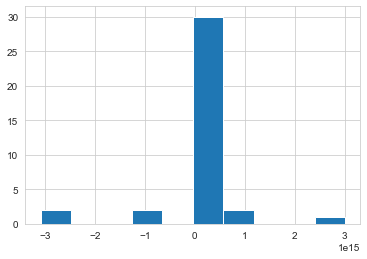

In [24]:
pd.Series(pipeline['ModelSelect'].estimator_.coef_.ravel()).hist()

<AxesSubplot:>

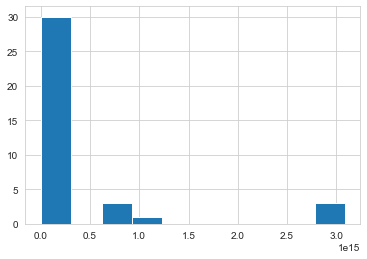

In [25]:
pd.Series(abs(pipeline['ModelSelect'].estimator_.coef_.ravel())).hist()

In [26]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(X_train.columns[pipeline['ModelSelect'].get_support()])))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(pipeline['ModelSelect'].estimator_.coef_) > np.abs(
                pipeline['ModelSelect'].estimator_.coef_).mean())))

total features: 37
selected features: 7
features with coefficients greater than the mean coefficient: 7


## Basic methods + Correlation + Embedded

In [27]:
df = pd.read_csv("./precleaned-datasets/dataset_2.csv")

In [28]:
df.shape

(50000, 109)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(
    labels=["target"], axis=1), df["target"], test_size=0.33, random_state=42)

In [30]:
pipeline = Pipeline([
    ("DropDuplicate",DropDuplicateFeatures()),
    ("DropConstant",DropConstantFeatures(tol=0.998)), #Drop Quasi-Constant Features
    ("DropCorrelated",DropCorrelatedFeatures()),
    ("Scaler", StandardScaler()),  # Scale the data
    ("ModelSelect", SelectFromModel(LogisticRegression(
        C=0.0005, penalty="l2", solver="liblinear")))  # Select the best features using ridge regularization (C is for the strenght of the regularization)
])

In [31]:
X_train_full_pipeline = pipeline.fit_transform(X_train,y_train)
X_test_full_pipeline = pipeline.transform(X_test)

In [32]:
pipeline["DropDuplicate"].features_to_drop_

set()

It seems there's no duplicate features.

In [33]:
pipeline["DropConstant"].features_to_drop_

[]

It seems there's no constant and quasi-constant features.

In [34]:
len(pipeline["DropCorrelated"].features_to_drop_)

35

We have 35 correlated features, with a coeffecicient of at least 0.8, to be dropped.

In [35]:
feat_to_drop = list(pipeline["DropCorrelated"].features_to_drop_)

In [36]:
#The dataframe passed to the scaler and the logistic regression for feature selection.
X_train[[x for x in X_train.columns if x not in feat_to_drop]].head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_89,var_90,var_91,var_92,var_93,var_96,var_98,var_99,var_103,var_107
23990,2.981817,8.343572,10.074981,3.691886,1.601302,1.453775,2.314913,0.584105,9.992991,0.170757,...,7.646199,16.989933,0.0,1.024162,0.222757,6.807153,4.139647,1.380598,15.728079,1.686957
8729,1.688889,8.882949,18.253119,5.912397,1.240284,1.046512,4.643527,0.756977,6.714417,0.012648,...,7.588980,11.808913,0.0,0.816097,0.156915,7.005375,1.308567,1.187880,12.992437,2.924444
3451,5.038962,7.026297,14.718972,4.212337,2.561462,2.048366,2.643073,0.276806,13.285719,0.262157,...,6.575890,17.957058,0.0,0.555222,0.632006,6.925507,1.880149,1.367646,16.227706,1.256104
2628,4.834286,3.451844,0.051099,3.260024,2.563308,1.840000,2.262627,0.531305,9.424492,0.397391,...,9.296788,17.129671,0.0,0.665388,0.239038,6.614862,1.347836,1.600000,18.216872,0.692858
38352,7.425000,8.710872,16.727121,3.654887,1.305672,1.866667,1.490619,0.673684,10.672352,0.066322,...,7.806098,18.262409,0.0,1.034191,0.256637,6.969556,1.650858,1.026178,18.419222,0.692391


In [37]:
len(pipeline["ModelSelect"].get_support())

73

In [38]:
def run_logistic(X_train, X_test, y_train, y_test):
    
    
    logit = LogisticRegression(C=0.0005, random_state=10, max_iter=10000, penalty='l2')
    logit.fit(X_train,y_train)
    
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))


In [39]:
run_logistic(X_train_full_pipeline, X_test_full_pipeline, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7033481605952046
Test set
Logistic Regression roc-auc: 0.6965087093536072


In [40]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [41]:
run_logistic(X_train_std, X_test_std, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7034356834144
Test set
Logistic Regression roc-auc: 0.6940124119602422


In [42]:
print(f"Number of features originally:{X_train_std.shape[1]}")
print(f"Number of features after feature selection:{X_train_full_pipeline.shape[1]}")

Number of features originally:108
Number of features after feature selection:11


We can see that divided the number of features decreaded dramatically from 108 to 11 but the roc-auc score is still the same!

# Lasso Regularisation

Lasso, also called l1 regularisation, can shrink the coefficients of the parameters to zero, therefore it can be used for feature selection, as opposite to ridge regression that will only reduce the coefficients to close to zero if needed.

## Classification

In [43]:
df = pd.read_csv("./precleaned-datasets/dataset_2.csv")

In [44]:
df = df[[x for x in df.columns if df[x].dtype != "object"]]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(
    labels=["target"], axis=1), df["target"], test_size=0.33, random_state=42)

In [55]:
pipeline = Pipeline([
    ("Scaler", StandardScaler()),  # Scale the data
    ("ModelSelect", SelectFromModel(LogisticRegression(
        C=0.5, penalty="l1", solver="liblinear")))  # Select the best features using ridge regularization (C is for the strenght of the regularization)
])

In [56]:
pipeline.fit_transform(X_train,y_train)

array([[-0.9995447 ,  0.61071996, -0.2157236 , ...,  0.02519677,
        -0.37697441, -0.99025251],
       [-1.75191556,  0.83674095,  1.02309158, ...,  1.17016505,
        -0.9715004 , -0.04318612],
       [ 0.19753291,  0.05872784,  0.48774282, ..., -0.37344439,
         0.01110261, -0.09315571],
       ...,
       [ 1.53188034, -0.3050191 , -1.51273686, ..., -1.01935498,
        -0.3671743 , -0.09007849],
       [ 2.369922  , -1.62033704,  0.86083838, ..., -0.83292693,
        -0.43169042, -0.66321598],
       [-0.41432578, -0.22391382,  0.86782015, ...,  0.1195084 ,
         0.59321507, -0.47288799]])

In [57]:
pipeline["ModelSelect"].get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [60]:
selected_feat = X_train.columns[pipeline["ModelSelect"].get_support()]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(pipeline["ModelSelect"].estimator_.coef_ == 0)))


total features: 108
selected features: 97
features with coefficients shrank to zero: 11


In [61]:
#Removed features
X_train.columns[~pipeline["ModelSelect"].get_support()]

Index(['var_8', 'var_19', 'var_24', 'var_25', 'var_27', 'var_29', 'var_30',
       'var_50', 'var_63', 'var_77', 'var_82'],
      dtype='object')

<AxesSubplot:>

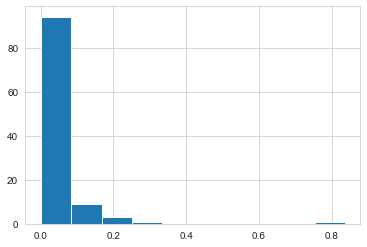

In [62]:
pd.Series(abs(pipeline['ModelSelect'].estimator_.coef_.ravel())).hist()

Most of the coefficients are around 0.

## Regression

In [ ]:
df = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")

In [ ]:
df = df[[x for x in df.columns if df[x].dtype != "object"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(
    labels=["SalePrice"], axis=1), df["SalePrice"], test_size=0.33, random_state=42)

In [ ]:
pipeline = Pipeline([
    ("Scaler", StandardScaler()),  # Scale the data
    # Select the best features using linear regression
    ("ModelSelect", SelectFromModel(LinearRegression()))
])

# Tree Method